<a href="https://colab.research.google.com/github/apurvakumbhar/machine-learning/blob/main/Exp02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:

!pip install --quiet pandas numpy scikit-learn

import pandas as pd

csv_path = '/content/drive/MyDrive/ML/data_for_lr.csv'
df = pd.read_csv(csv_path)
print(df.columns)

Index(['x', 'y'], dtype='object')


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
X = df[['x']].values.flatten()
Y = df['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:

w=0
b=0

learning_rate=0.001
epochs=1000


def for_propagation(X, w, b):
    return X * w + b

def compute_cost(Y_true, Y_pred):
    return (1 / (2 * len(Y_true))) * np.sum((Y_pred - Y_true) ** 2)

def compute_gradient(X, Y_true, Y_pred):
    m = len(Y_true)
    dw = (1/m) * np.dot(X, (Y_pred - Y_true))
    db = (1/m) * np.sum(Y_pred - Y_true)
    return dw, db

In [71]:
for epoch in range(epochs):
    Y_pred_train = for_propagation(X_train, w, b)
    cost = compute_cost(Y_train, Y_pred_train)
    dw, db = compute_gradient(X_train, Y_train, Y_pred_train)

    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.6f}")

# Evaluate after training
Y_pred_test = for_propagation(X_test, w, b)
test_cost = compute_cost(Y_test, Y_pred_test)
print(f"Test Cost: {test_cost:.6f}")

Epoch 0: Cost = nan
Epoch 50: Cost = nan
Epoch 100: Cost = nan
Epoch 150: Cost = nan
Epoch 200: Cost = nan
Epoch 250: Cost = nan
Epoch 300: Cost = nan
Epoch 350: Cost = nan
Epoch 400: Cost = nan
Epoch 450: Cost = nan
Epoch 500: Cost = nan
Epoch 550: Cost = nan
Epoch 600: Cost = nan
Epoch 650: Cost = nan
Epoch 700: Cost = nan
Epoch 750: Cost = nan
Epoch 800: Cost = nan
Epoch 850: Cost = nan
Epoch 900: Cost = nan
Epoch 950: Cost = nan
Test Cost: nan


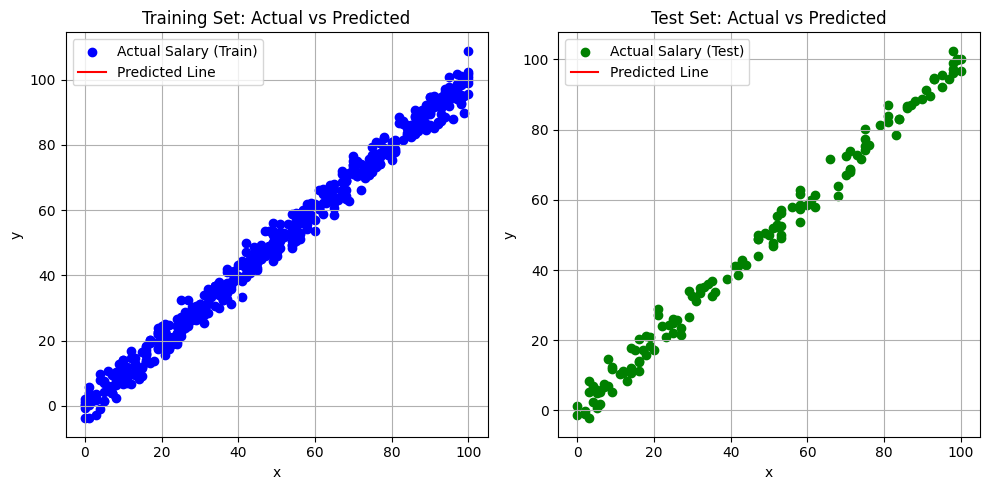

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Predict using trained model
Y_pred_train = for_propagation(X_train, w, b)
Y_pred_test = for_propagation(X_test, w, b)

# Sort training data for line plot
sorted_train_idx = np.argsort(X_train.flatten())
X_train_sorted = X_train[sorted_train_idx]
Y_pred_train_sorted = Y_pred_train[sorted_train_idx]

# Sort test data for line plot
sorted_test_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_test_idx]
Y_pred_test_sorted = Y_pred_test[sorted_test_idx]

# 1. Plot for Training Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='blue', label='Actual Salary (Train)')
plt.plot(X_train_sorted, Y_pred_train_sorted, color='red', label='Predicted Line')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 2. Plot for Test Data
plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test, color='green', label='Actual Salary (Test)')
plt.plot(X_test_sorted, Y_pred_test_sorted, color='red', label='Predicted Line')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
